In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
feature = ['温度(室外)', '湿度(室外)', '气压(室外)','湿度(室内)']
label = ['temperature']

train = pd.read_csv('../data/raw/chusai/train/train.csv')
test = pd.read_csv('../data/raw/chusai//test/test.csv')

In [12]:
feature = ['温度(室外)', '湿度(室外)', '气压(室外)', '气压(室内)', '湿度(室内)']
label = ['temperature']

new_col = {'年':'year',
           '月':'month',
           '日':'day',
           '小时':'hour',
           '分钟':'minute',
           '秒':'second',
        '温度(室外)':'temp_out',
          '湿度(室外)':'hum_out',
           '气压(室外)':'pressure_out',
           '气压(室内)':'pressure_in',
    '湿度(室内)':'hum_in',
}

# rename columns
train = train.rename(columns = new_col)
test = test.rename(columns = new_col)

print(train.shape, test.shape)

(25497, 13) (406, 12)


In [13]:
def get_time_feature(df):
    df['time_combined'] = df['year'].apply(str)+'-'+df['month'].apply(str)\
                        +'-'+df['day'].apply(str) +' '+df['hour'].apply(str)\
                        +':'+df['minute'].apply(str) \
                        #+':'+df['second'].apply(str)
    
    df['time_combined'] = pd.to_datetime(df['time_combined'])
    df['dayofweek'] = df['time_combined'].dt.dayofweek

    df.set_index(['time_combined'], inplace=True)
    
    
    
    return df 

new_feature = ['temp_out',
       'hum_out', 'pressure_out', 'hum_in', 
               #'pressure_in', 
               'temperature' ]

train = get_time_feature(train)
test = get_time_feature(test)

In [14]:
train.head(20)

,time,year,month,day,hour,minute,second,temp_out,hum_out,pressure_out,hum_in,pressure_in,temperature,dayofweek
time_combined,,,,,,,,,,,,,,
2019-03-14 01:00:00,1552496443,2019,3,14,1,0,43,14.6,85.0,993.1,80.0,992.4,15.4,3
2019-03-14 01:01:00,1552496503,2019,3,14,1,1,43,14.7,84.0,993.0,80.0,992.6,15.4,3
2019-03-14 01:02:00,1552496565,2019,3,14,1,2,45,14.7,84.0,992.7,80.0,992.8,15.4,3
2019-03-14 01:03:00,1552496624,2019,3,14,1,3,44,14.6,85.0,993.2,80.0,992.6,15.4,3
2019-03-14 01:04:00,1552496682,2019,3,14,1,4,42,14.6,85.0,992.7,80.0,992.6,15.3,3
2019-03-14 01:05:00,1552496745,2019,3,14,1,5,45,14.6,85.0,993.1,80.0,992.9,15.3,3
2019-03-14 01:06:00,1552496804,2019,3,14,1,6,44,14.5,85.0,993.6,80.0,409.6,15.3,3
2019-03-14 01:07:00,1552496862,2019,3,14,1,7,42,14.5,85.0,993.6,80.0,992.8,15.3,3
2019-03-14 01:08:00,1552496925,2019,3,14,1,8,45,14.5,85.0,993.4,80.0,993.2,15.3,3


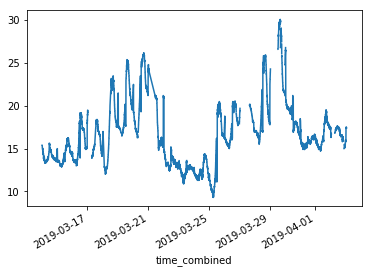

In [15]:
train['temperature'].plot()

## Detection
We find time 00:00-01:00 has been exchanged with 12:00-13:00.


This may be designed intendly to check player's EDA capability.

(1440, 14)


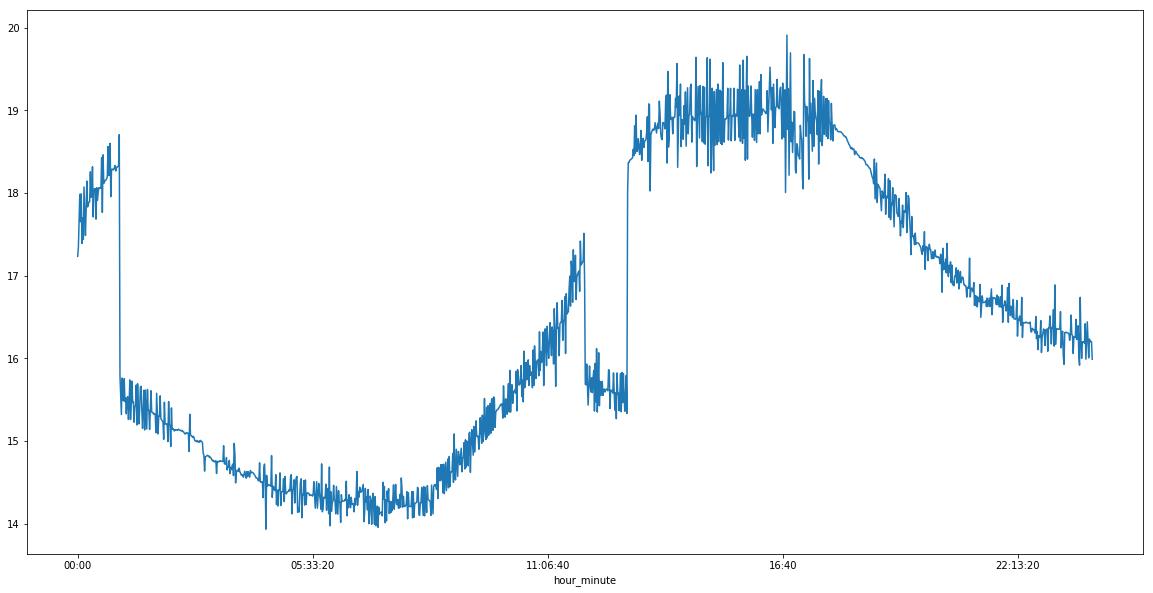

In [28]:
gp_mean = train.groupby(['hour', 'minute']).mean()
gp_mean = gp_mean.reset_index()

gp_mean['hour_minute'] = (pd.to_datetime(gp_mean['hour'].astype(str) + ':' + gp_mean['minute'].astype(str), format='%H:%M')
          .dt.time)
gp_mean.set_index(['hour_minute'], inplace=True)

print(gp_mean.shape)
plt.figure(figsize=(20,10))
gp_mean['temperature'].plot()

(24, 1)


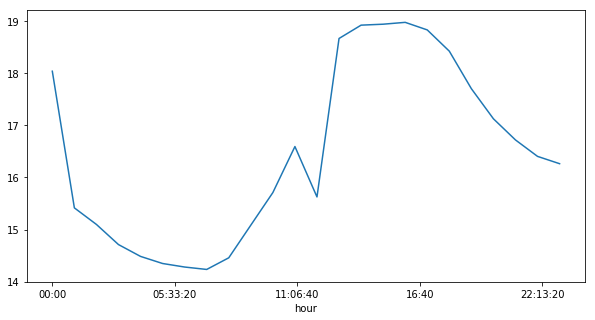

In [29]:
gp_hour_mean = train.groupby(['hour'])['temperature'].mean()
gp_hour_mean = gp_hour_mean.reset_index()

gp_hour_mean['hour'] = (pd.to_datetime(gp_hour_mean['hour'].astype(str), 
                                         format='%H').dt.time)
gp_hour_mean.set_index(['hour'], inplace=True)

print(gp_hour_mean.shape)
plt.figure(figsize=(10,5))
gp_hour_mean['temperature'].plot()

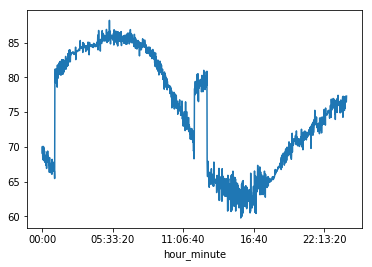

In [30]:
gp_mean['hum_out'].plot()

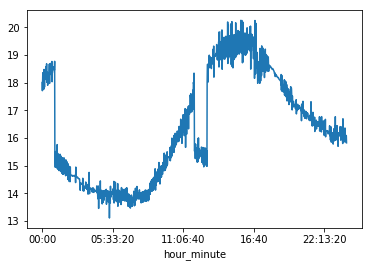

In [31]:
gp_mean['temp_out'].plot()

## Let's exchange the wrong values.

In [51]:
def exchange_time(df):
    
    # A trick for swap
    df.loc[df['hour'] == 0, 'hour'] = 999
    df.loc[df['hour'] == 12, 'hour'] = 888
    df.loc[df['hour'] == 999, 'hour'] = 12
    df.loc[df['hour'] == 888, 'hour'] = 0
    
    return df

correct_train = train.copy()
correct_train = exchange_time(correct_train)
correct_train = get_time_feature(correct_train)

(1440, 15)


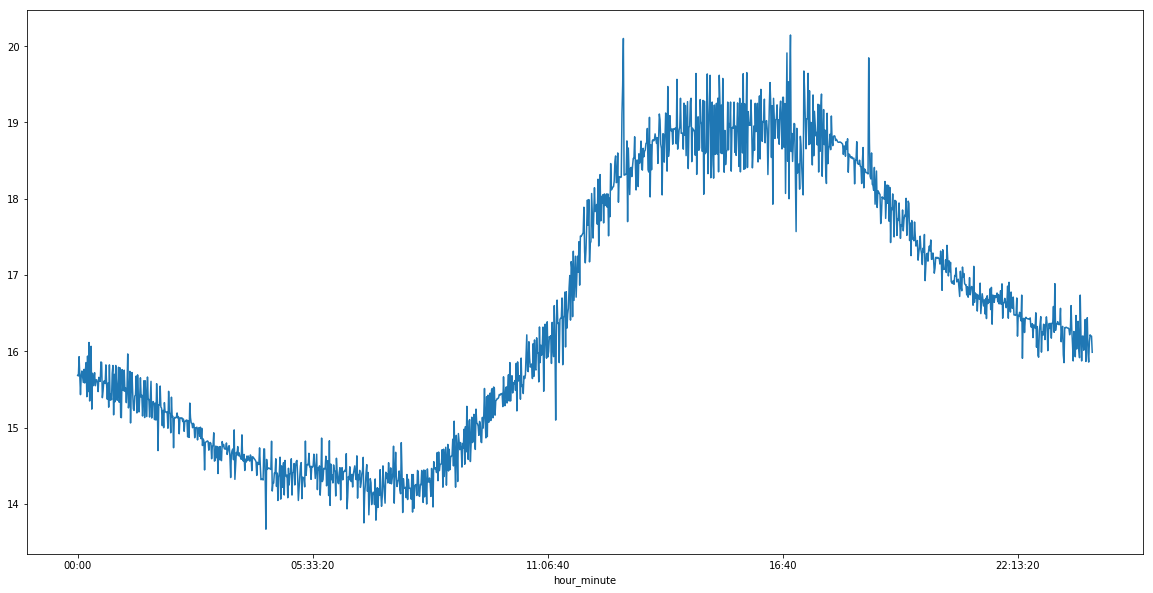

In [65]:
def get_mean_stats(df):
    gp_mean = df.groupby(['hour', 'minute']).mean()
    gp_mean = gp_mean.reset_index()

    gp_mean['hour_minute'] = (pd.to_datetime(gp_mean['hour'].astype(str) + ':' + gp_mean['minute'].astype(str), format='%H:%M')
              .dt.time)
    gp_mean.set_index(['hour_minute'], inplace=True)

    print(gp_mean.shape)
    plt.figure(figsize=(20,10))
    
    
    return gp_mean

train_mean = get_mean_stats(correct_train)
train_mean['temperature'].plot()

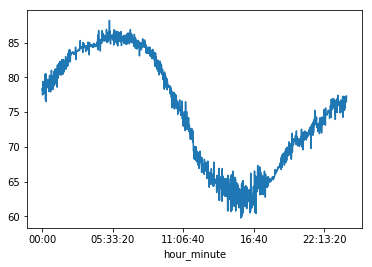

In [34]:
gp_mean['hum_out'].plot()

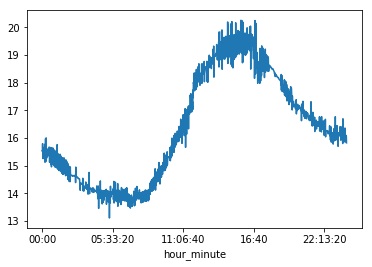

In [35]:
gp_mean['temp_out'].plot()

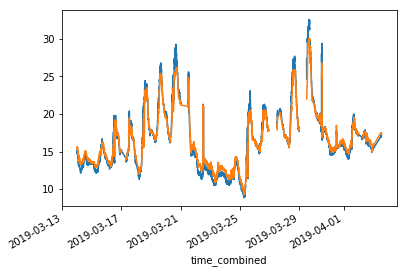

In [53]:
correct_train['temp_out'].plot()
correct_train['temperature'].plot()

In [55]:
new_feature

['temp_out', 'hum_out', 'pressure_out', 'hum_in', 'temperature']

In [57]:
def missing_imputation(df, is_train):
    for col in new_feature:
        df[col] = df[col].fillna(method='ffill')
    if is_train:
        df['temperature'] = df['temperature'].fillna(method='ffill')       
    return df

correct_train = missing_imputation(correct_train, is_train=True)

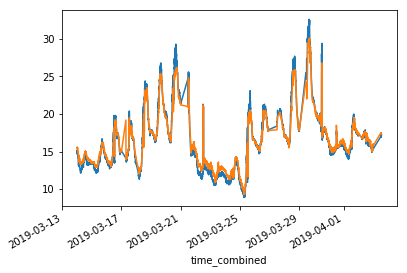

In [61]:
correct_train['temp_out'].plot()
correct_train['temperature'].plot()

In [76]:
correct_train.tail(5)

,time,year,month,day,hour,minute,second,temp_out,hum_out,pressure_out,hum_in,pressure_in,temperature,dayofweek,temp_diff
time_combined,,,,,,,,,,,,,,,
2019-04-03 12:55:00,1554224151,2019,4,3,12,55,51,17.3,78.0,983.8,75.0,982.2,17.4,2,0.1
2019-04-03 12:56:00,1554224212,2019,4,3,12,56,52,17.3,77.0,983.4,75.0,982.5,17.4,2,0.1
2019-04-03 12:57:00,1554224272,2019,4,3,12,57,52,17.3,77.0,983.1,75.0,982.2,17.4,2,0.1
2019-04-03 12:58:00,1554224332,2019,4,3,12,58,52,17.3,77.0,983.3,75.0,982.5,17.4,2,0.1
2019-04-03 12:59:00,1554224391,2019,4,3,12,59,51,17.2,77.0,982.9,75.0,982.4,17.4,2,0.2


In [77]:
test.head(5)

,time,year,month,day,hour,minute,second,temp_out,hum_out,pressure_out,hum_in,temperature,dayofweek
time_combined,,,,,,,,,,,,,
2019-04-03 01:00:00,1554224413,2019,4,3,1,0,13,15.3,91.0,988.0,88.0,988.3,2
2019-04-03 01:30:00,1554226217,2019,4,3,1,30,17,15.4,91.0,987.8,88.0,988.0,2
2019-04-03 02:00:00,1554228020,2019,4,3,2,0,20,15.3,92.0,988.0,89.0,988.3,2
2019-04-03 02:30:00,1554229823,2019,4,3,2,30,23,15.2,92.0,988.1,89.0,988.7,2
2019-04-03 03:00:00,1554231625,2019,4,3,3,0,25,15.5,91.0,987.9,88.0,987.9,2


In [95]:
def custom_round(x, base=5):
    if x >=55:
        x = 55
        
    return int(base * round(float(x)/base))

In [99]:
train['minute_round'] = train['minute'].apply(custom_round)
train['minute_round'].value_counts()

55    2977
50    2146
15    2140
30    2138
35    2135
25    2133
20    2132
40    2128
45    2125
5     2098
10    2089
0     1256
Name: minute_round, dtype: int64

In [97]:
test['minute_round'] = test['minute'].apply(custom_round)
test['minute_round'].value_counts()

30    68
0     54
55    44
5     34
10    33
40    32
25    31
35    29
45    22
20    22
15    19
50    18
Name: minute_round, dtype: int64

In [84]:
test['minute_round'].value_counts()

30    68
0     54
55    36
5     34
10    33
40    32
25    31
35    29
45    22
20    22
15    19
50    18
60     8
Name: minute_round, dtype: int64

In [78]:
test['minute'].value_counts()

1     29
31    25
30    20
32    15
11    13
0     13
2     12
5     12
41    10
26    10
6     10
56    10
36     9
13     9
27     8
37     8
42     8
7      8
57     8
54     8
55     7
43     7
16     7
21     7
10     7
35     7
24     6
59     6
46     6
44     6
20     5
12     5
51     5
25     5
9      5
39     5
40     5
28     4
52     4
3      4
22     4
38     4
18     4
29     4
14     3
49     3
47     3
50     3
48     3
53     3
8      3
33     3
19     2
23     2
34     2
58     2
Name: minute, dtype: int64

In [71]:
test['hour'].value_counts()

21    20
22    20
18    20
23    19
20    19
16    18
13    18
11    18
17    18
19    18
0     17
14    16
12    16
10    16
9     16
6     16
3     16
15    15
8     15
7     15
5     15
4     15
2     15
1     15
Name: hour, dtype: int64

(351, 13)


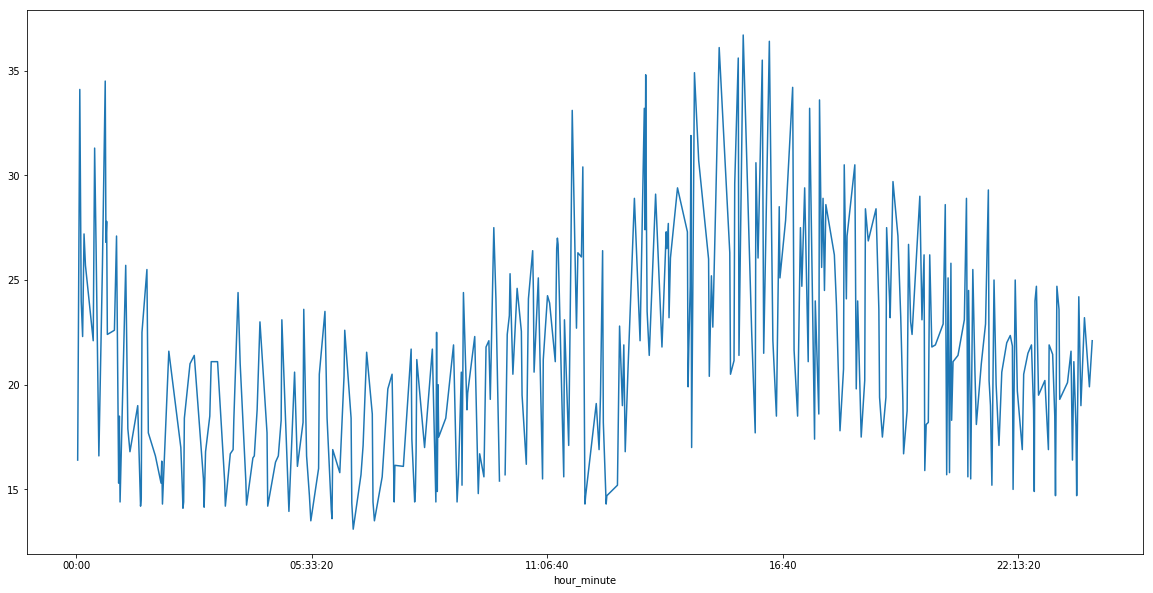

In [66]:
test_mean = get_mean_stats(test)
test_mean['temp_out'].plot()

In [58]:
correct_train['temp_diff'] = correct_train['temperature'] - correct_train['temp_out']

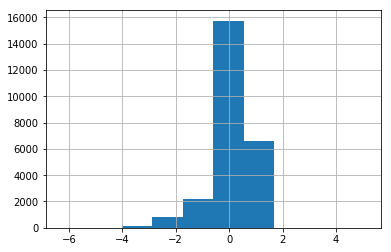

In [59]:
correct_train['temp_diff'].hist()

In [54]:
def get_nan_info(df, cols):
    for c in cols:        
        print(c, 'NaN nums:', train[c].isna().sum())

print(' \n ### Training set')
get_nan_info(train, new_feature)
get_nan_info(train, label)

print(' \n ### Test set')
get_nan_info(test, new_feature)
get_nan_info(test, label)

 
 ### Training set
temp_out NaN nums: 660
hum_out NaN nums: 660
pressure_out NaN nums: 660
hum_in NaN nums: 690
temperature NaN nums: 690
temperature NaN nums: 690
 
 ### Test set
temp_out NaN nums: 660
hum_out NaN nums: 660
pressure_out NaN nums: 660
hum_in NaN nums: 690
temperature NaN nums: 690
temperature NaN nums: 690


In [55]:
print(test.shape)
test.head(10)

(406, 13)


,time,year,month,day,hour,minute,second,temp_out,hum_out,pressure_out,hum_in,temperature,dayofweek
0,2019-04-03 01:00:13,2019,4,3,1,0,13,15.3,91.0,988.0,88.0,988.3,2
1,2019-04-03 01:30:17,2019,4,3,1,30,17,15.4,91.0,987.8,88.0,988.0,2
2,2019-04-03 02:00:20,2019,4,3,2,0,20,15.3,92.0,988.0,89.0,988.3,2
3,2019-04-03 02:30:23,2019,4,3,2,30,23,15.2,92.0,988.1,89.0,988.7,2
4,2019-04-03 03:00:25,2019,4,3,3,0,25,15.5,91.0,987.9,88.0,987.9,2
5,2019-04-03 03:30:29,2019,4,3,3,30,29,15.4,91.0,989.6,88.0,987.6,2
6,2019-04-03 04:00:32,2019,4,3,4,0,32,15.4,92.0,989.3,89.0,987.9,2
7,2019-04-03 04:30:35,2019,4,3,4,30,35,14.8,93.0,989.5,89.0,988.7,2
8,2019-04-03 05:00:38,2019,4,3,5,0,38,14.8,92.0,988.4,88.0,407.7,2
9,2019-04-03 05:30:42,2019,4,3,5,30,42,14.7,91.0,990.2,88.0,988.4,2


In [61]:
train['month'].unique(), test['month'].unique()

(array([3, 4]), array([4]))

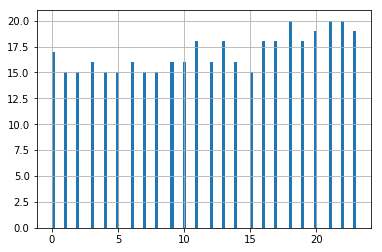

In [59]:
test['hour'].hist(bins=100)

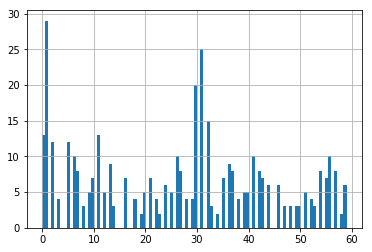

In [58]:
test['minute'].hist(bins=100)

In [18]:
to_csv('../submit/baseline_LR.csv',index=False)